In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

Given text the aim of this project is to classify text into various topics based on the semantic match of the keywords contained within
the topics. This is done using LDA. 


Further scope for improvement (refer READ ME) : 
1) Use bigrams and trigrams as well

In [2]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google'

In [5]:
df = pd.read_excel('Interview-data-set-semantic-topic-tagging.xlsx')

In [7]:
df.shape
#shape of data

(1575, 7)

In [8]:
df.head(10)

,article_id,source_link,article_url,title,Content,append_topic,topic_keyword
0,b018fcab57396d80ed17ab3083aed8bd,https://www.belfasttelegraph.co.uk/news/,https://www.belfasttelegraph.co.uk/life/house-...,Hilltop Lisburn property with spa complex and ...,It's the kind of property that you'd see in a ...,NaN,NaN
1,cc9cf2ca1680c54eac977125caf9c9af,https://www.belfasttelegraph.co.uk/news/,https://www.belfasttelegraph.co.uk/entertainme...,‘Life in the tough cul de sacs of Bangor’: NI ...,Northern Ireland writer Colin Bateman has reve...,NaN,NaN
2,2b681d03fb5a8529d6479a67c2475b1a,https://www.belfasttelegraph.co.uk/news/,https://www.belfasttelegraph.co.uk/life/house-...,Diarmuid Gavin: How to prepare your garden for...,"Premium Clear dead leaves, fill planting gaps ...",NaN,NaN
3,55b3c801df824983d5a7d49d13a7a871,https://www.belfasttelegraph.co.uk/news/,https://www.belfasttelegraph.co.uk/life/house-...,Period property in exclusive Co Down residenti...,Nestled in what has long been regarded as one ...,NaN,NaN
4,4dc1f31a0e4ff27a0b0823f58782ec7d,https://www.belfasttelegraph.co.uk/news/,https://www.belfasttelegraph.co.uk/sunday-life...,How to Bury a Dead Mule: ‘WW2 gave my grandfat...,Bangor actor Richard Clements on bringing his ...,NaN,NaN
5,928bc131fa6baf747e75a9445ffd2bb5,https://www.belfasttelegraph.co.uk/news/,https://www.belfasttelegraph.co.uk/entertainme...,It’s a whole new ball game for Glentoran as ne...,Irish League football club Glentoran are hopin...,NaN,NaN
6,f5143c74f53ea4242aa55ed89fcbcb08,https://www.belfasttelegraph.co.uk/news/,https://www.belfasttelegraph.co.uk/entertainme...,Portadown twins narrowly miss out on major UK ...,A pair of identical 12-year-old twins from Co ...,NaN,NaN
7,011358b59b15baec6607648613a08cd5,https://www.belfasttelegraph.co.uk/news/,https://www.belfasttelegraph.co.uk/life/house-...,21 Ward Avenue: Extensive family home on sough...,Number 21 offers flexible as well as spacious ...,NaN,NaN
8,3b24db9224ffe0cb6386b906292371cc,https://www.belfasttelegraph.co.uk/news/,https://www.belfasttelegraph.co.uk/news/northe...,How we made Roald Dahl’s Matilda the Musical: ...,As the whistle blows in the dreaded playground...,NaN,NaN
9,8b2174a610a647963cb1cbffc390a15d,https://www.belfasttelegraph.co.uk/news/,https://www.belfasttelegraph.co.uk/news/northe...,Ulster Orchestra chief takes final bow leaving...,Premium During his six years in the job Richar...,NaN,NaN


In [9]:
df["source_link"].value_counts()

source_link
https://www.belfasttelegraph.co.uk/news/    1575
Name: count, dtype: int64

In [10]:
df["article_url"].nunique()

1575

In [11]:
df["article_id"].nunique()

1575

In [12]:
#All articles are from the same source just the url is different because of different items being accessed

In [13]:
# Drop the first three columns
df = df.drop(columns=['article_id', 'source_link', 'article_url'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1575 non-null   object 
 1   Content        1575 non-null   object 
 2   append_topic   0 non-null      float64
 3   topic_keyword  0 non-null      float64
dtypes: float64(2), object(2)
memory usage: 49.3+ KB


In [15]:
df.nunique()

title            1574
Content          1575
append_topic        0
topic_keyword       0
dtype: int64

In [16]:
df['t_content'] = df['title'] + " " + df['Content']

In [17]:
df["title"][0]

'Hilltop Lisburn property with spa complex and annexed apartment is worth its £2m pricetag'

In [18]:
df["Content"][0]

"It's the kind of property that you'd see in a film or TV show — but the impressive 12 Mullaghglass Road is to be found in Lisburn. Extending to one acre, the elevated property benefits from unrivalled and uninterrupted views across the city, Belfast and towards the Mourne Mountains. Though unquestionably a fantastic family home, the property is fully registered with the NI Tourist Board as a bed and breakfast. The Mullaghglass property was constructed within the last year and as you'd expect, offers beautifully considered accommodation at the highest of standards. Delivering in excess of 10,00"

In [19]:
df["t_content"][0]

"Hilltop Lisburn property with spa complex and annexed apartment is worth its £2m pricetag It's the kind of property that you'd see in a film or TV show — but the impressive 12 Mullaghglass Road is to be found in Lisburn. Extending to one acre, the elevated property benefits from unrivalled and uninterrupted views across the city, Belfast and towards the Mourne Mountains. Though unquestionably a fantastic family home, the property is fully registered with the NI Tourist Board as a bed and breakfast. The Mullaghglass property was constructed within the last year and as you'd expect, offers beautifully considered accommodation at the highest of standards. Delivering in excess of 10,00"

In [20]:
#Lets get a WordCloud before and after processing

In [21]:
from collections import Counter
def flatten(list_of_lists):
    flat_list = []
    for  l in list_of_lists:
        flat_list.extend(l)
    return flat_list

In [22]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [23]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from matplotlib import pyplot as plt

def wordcloud_plot(counter_all):
    w = WordCloud().generate_from_frequencies(frequencies=dict(counter_all))
    plt.imshow(w)

def tokenize(text):
    tokens = [w for w in word_tokenize(text.lower())]
    return tokens

In [24]:
counter_all = Counter(flatten(df["t_content"].apply(tokenize).tolist()))
counter_all.most_common(10)

[('the', 9987),
 (',', 6494),
 ('.', 5173),
 ('to', 4756),
 ('of', 4597),
 ('a', 4365),
 ('in', 4052),
 ('and', 3843),
 ('for', 1954),
 ('on', 1951)]

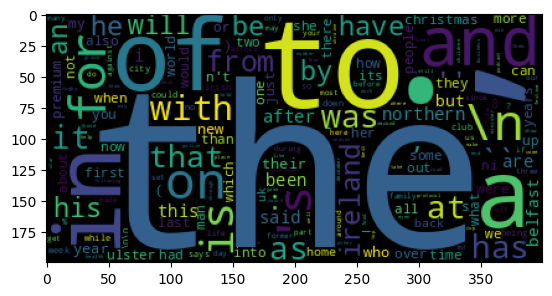

In [25]:
wordcloud_plot(counter_all)

In [26]:
#lot of punctuation and stop words

In [27]:
#lets clean the content and then print the wordcloud

In [28]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [29]:
#Preprocessing function
def preprocess_text(text):

    text = text.lower()

    #remove \\n \\xc and similar type
    text = re.sub(r'\\+[a-zA-Z0-9\.]+', ' ', text)

    # Step 1: Remove non-letters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Step 2: Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)

    words = [word for word in words if word.lower() not in stop_words]

    # Step 3: Word Tokenization (already done in Step 2)

    # Step 4: Perform Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Combine the preprocessed words into a string
    preprocessed_text = ' '.join(words)

    return preprocessed_text

In [30]:
input_text = "This is an Example sentence with non-letters, stopwords, and some lemmatization."
result = preprocess_text(input_text)
print("Original Text:", input_text)
print("Preprocessed Text:", result)

Original Text: This is an Example sentence with non-letters, stopwords, and some lemmatization.
Preprocessed Text: example sentence non letter stopwords lemmatization


In [31]:
df["t_content"][100]

'Bullitt Hotel announces new rooftop bar and restaurant after £1m revamp Belfast hotel Bullitt has reopened its rooftop garden restaurant and bar following a £1 million facelift. Tetto, formerly known as Babel, will be open to the public from Friday and will be complete with a fresh design and interiors alongside a new bar, and Italian restaurant. The owners say the revamped space will offer "something unique" in Belfast, with Tetto showcasing fresh local seafood with an Italian accent alongside sourdough pizza and aperitivo inspired cocktails. The new hospitality location will be open from Wednesday to Sundays and will also feature a resident DJ every weekend with'

In [32]:
preprocess_text(df["t_content"][100])

'bullitt hotel announces new rooftop bar restaurant revamp belfast hotel bullitt reopened rooftop garden restaurant bar following million facelift tetto formerly known babel open public friday complete fresh design interior alongside new bar italian restaurant owner say revamped space offer something unique belfast tetto showcasing fresh local seafood italian accent alongside sourdough pizza aperitivo inspired cocktail new hospitality location open wednesday sunday also feature resident dj every weekend'

In [33]:
df1 = df.copy()

In [34]:
# Apply the preprocess_text function to the 't_content' column
df['t_content'] = df['t_content'].apply(preprocess_text)

In [35]:
counter_all = Counter(flatten(df["t_content"].apply(tokenize).tolist()))
counter_all.most_common(10)

[('year', 985),
 ('ireland', 844),
 ('northern', 655),
 ('said', 648),
 ('belfast', 578),
 ('new', 495),
 ('one', 440),
 ('time', 420),
 ('premium', 372),
 ('christmas', 359)]

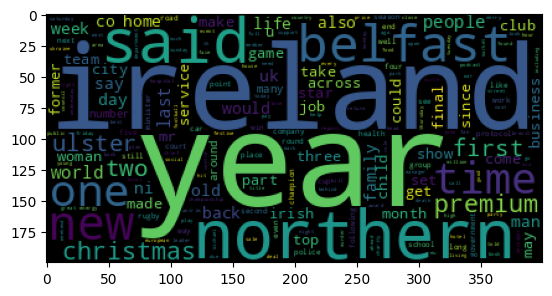

In [36]:
wordcloud_plot(counter_all)

In [37]:
df.head(10)

,title,Content,append_topic,topic_keyword,t_content
0,Hilltop Lisburn property with spa complex and ...,It's the kind of property that you'd see in a ...,NaN,NaN,hilltop lisburn property spa complex annexed a...
1,‘Life in the tough cul de sacs of Bangor’: NI ...,Northern Ireland writer Colin Bateman has reve...,NaN,NaN,life tough cul de sac bangor ni writer colin b...
2,Diarmuid Gavin: How to prepare your garden for...,"Premium Clear dead leaves, fill planting gaps ...",NaN,NaN,diarmuid gavin prepare garden winter premium c...
3,Period property in exclusive Co Down residenti...,Nestled in what has long been regarded as one ...,NaN,NaN,period property exclusive co residential area ...
4,How to Bury a Dead Mule: ‘WW2 gave my grandfat...,Bangor actor Richard Clements on bringing his ...,NaN,NaN,bury dead mule ww gave grandfather ptsd want k...
5,It’s a whole new ball game for Glentoran as ne...,Irish League football club Glentoran are hopin...,NaN,NaN,whole new ball game glentoran new stage produc...
6,Portadown twins narrowly miss out on major UK ...,A pair of identical 12-year-old twins from Co ...,NaN,NaN,portadown twin narrowly miss major uk theatre ...
7,21 Ward Avenue: Extensive family home on sough...,Number 21 offers flexible as well as spacious ...,NaN,NaN,ward avenue extensive family home sought bango...
8,How we made Roald Dahl’s Matilda the Musical: ...,As the whistle blows in the dreaded playground...,NaN,NaN,made roald dahl matilda musical west end music...
9,Ulster Orchestra chief takes final bow leaving...,Premium During his six years in the job Richar...,NaN,NaN,ulster orchestra chief take final bow leaving ...


In [38]:
#unigrams
#christmas #year #new #ireland #northern #belfast

In [39]:
#possible bigrams
#nothern ireland #new year #christmas time

In [40]:
pip install pyLDavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.6 MB/s eta 0:00:00


In [41]:
import gensim
import pyLDAvis
import spacy
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [42]:
english_stopwords = set(stopwords.words('english'))

In [43]:
#sanity check again that we are not returning stopwrods and only word tokens
def tokenize_clean(text):
    tokens = [w for w in word_tokenize(text.lower()) if w not in english_stopwords and w.isalpha()]
    return tokens

In [44]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

In [45]:
tokenized_clean_content = df["t_content"].apply(tokenize_clean)

In [46]:
vocabulary = Dictionary(tokenized_clean_content)
vocabulary

In [47]:
bag_of_words_documents = [vocabulary.doc2bow(text) for text in tokenized_clean_content]

In [48]:
len(bag_of_words_documents)

1575

In [49]:
#Need to find the right number of topics for LDA algorithms

In [50]:
#Use HDP from Gensim

In [51]:
hdp_model = gensim.models.hdpmodel.HdpModel(corpus=bag_of_words_documents, id2word=vocabulary)

In [52]:
print(hdp_model.print_topics())

[(0, '0.005*year + 0.004*said + 0.004*belfast + 0.004*ireland + 0.004*christmas + 0.003*northern + 0.003*time + 0.002*man + 0.002*new + 0.002*world'), (1, '0.005*year + 0.004*ireland + 0.004*northern + 0.003*new + 0.003*christmas + 0.003*one + 0.003*said + 0.002*life + 0.002*number + 0.002*come'), (2, '0.005*year + 0.004*ulster + 0.003*said + 0.003*first + 0.003*record + 0.002*ireland + 0.002*world + 0.002*belfast + 0.002*team + 0.002*one'), (3, '0.004*ireland + 0.004*northern + 0.004*year + 0.002*said + 0.002*ukraine + 0.002*new + 0.002*would + 0.002*zelensky + 0.002*family + 0.002*mr'), (4, '0.003*time + 0.003*ireland + 0.002*year + 0.002*government + 0.002*northern + 0.002*ticket + 0.002*swift + 0.002*said + 0.002*netanyahu + 0.002*u'), (5, '0.002*year + 0.002*said + 0.002*show + 0.002*belfast + 0.001*january + 0.001*christmas + 0.001*world + 0.001*star + 0.001*special + 0.001*northern'), (6, '0.003*year + 0.002*health + 0.002*ireland + 0.001*man + 0.001*stephen + 0.001*premium + 0.

In [53]:
a = hdp_model[vocabulary.doc2bow(tokenize_clean( df["t_content"][0])) ]

In [54]:
print(a)

[(0, 0.48232780483015675), (53, 0.16920062250639606), (63, 0.3340724490054409)]


In [55]:
import matplotlib.pyplot as plt

from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

In [56]:
corpus = bag_of_words_documents

In [57]:
id2word = vocabulary

In [58]:
from pprint import pprint

In [78]:
lda_model = LdaModel(corpus=bag_of_words_documents,
                   id2word=vocabulary,
                   num_topics=10,
                   passes =5,
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.039*"ireland" + 0.035*"northern" + 0.019*"said" + 0.013*"uk" + 0.013*"ni" '
  '+ 0.011*"job" + 0.011*"business" + 0.008*"government" + 0.008*"company" + '
  '0.007*"protocol"'),
 (1,
  '0.024*"search" + 0.019*"limelight" + 0.017*"belfast" + 0.015*"liam" + '
  '0.014*"march" + 0.013*"mcburney" + 0.013*"razorpix" + 0.013*"weapon" + '
  '0.011*"article" + 0.010*"nh"'),
 (2,
  '0.013*"one" + 0.012*"time" + 0.012*"year" + 0.011*"christmas" + '
  '0.010*"premium" + 0.007*"first" + 0.007*"show" + 0.006*"back" + '
  '0.006*"people" + 0.006*"say"'),
 (3,
  '0.013*"two" + 0.012*"belfast" + 0.012*"record" + 0.011*"history" + '
  '0.010*"year" + 0.010*"tour" + 0.009*"open" + 0.009*"agreement" + '
  '0.009*"released" + 0.009*"amid"'),
 (4,
  '0.023*"child" + 0.020*"mr" + 0.012*"martin" + 0.012*"parent" + '
  '0.010*"varadkar" + 0.009*"song" + 0.009*"unionist" + 0.009*"award" + '
  '0.008*"taoiseach" + 0.008*"irish"'),
 (5,
  '0.025*"club" + 0.020*"final" + 0.017*"ulster" + 0.016*"return" 

In [80]:
doc_lda = lda_model[corpus]

In [81]:
#list of individual tokens
tweets = tokenized_clean_content

In [82]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.40755140874622764


In [83]:
#Creating Topic Distance Visualization
from pyLDAvis import gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.191306 -0.258641       1        1  31.634842
9     -0.211361  0.121755       2        1  16.214818
0     -0.217493  0.150715       3        1  16.191482
7      0.023659  0.018650       4        1   8.699479
3      0.031939  0.003558       5        1   6.767034
5      0.049546 -0.153976       6        1   6.587105
4      0.156125  0.081266       7        1   4.520211
6      0.101811  0.089093       8        1   4.308156
8      0.119128 -0.084004       9        1   2.793946
1      0.137952  0.031584      10        1   2.282926, topic_info=          Term        Freq       Total Category  logprob  loglift
89    northern  704.000000  704.000000  Default  30.0000  30.0000
75     ireland  863.000000  863.000000  Default  29.0000  29.0000
487     ulster  281.000000  281.000000  Default  28.0000  28.0000
7      belfast  593.000000  593.000000  Default  27.0000  27.0000
274       club  186.000000  186.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
1704    monday   21.518988   70.111690  Topic10  -4.7167   2.5986
1049     light   16.969410   46.580556  Topic10  -4.9542   2.7699
365      close   17.241088   72.025866  Topic10  -4.9383   2.3500
621     people   18.518028  347.626376  Topic10  -4.8669   0.8473
1047      full   16.735191   73.079952  Topic10  -4.9681   2.3057

[499 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3496     10  0.951816        aaa
3154      7  0.979807      abuse
639       8  0.987374  according
3155      4  0.969127    accused
2         1  0.129737     across
...     ...       ...        ...
56        7  0.000932       year
56        8  0.035410       year
1312      1  0.991674        yet
806       1  0.991965      young
3224      2  0.990966   zelensky

[709 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 1, 8, 4, 6, 5, 7, 9, 2])

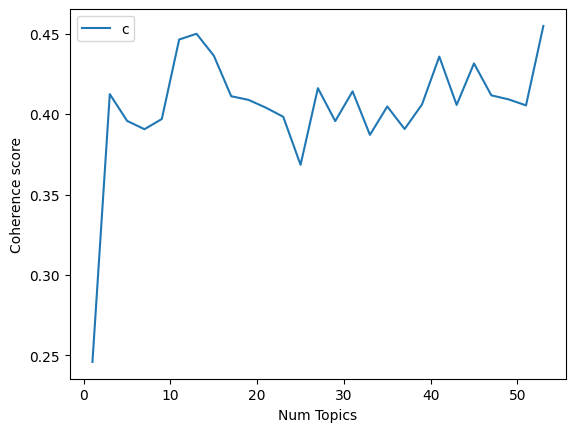

In [84]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=num_topics,
                   passes=5,
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=tweets, start=1, limit=55, step=2)

# Show graph
limit=55; start=1; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [91]:
best_result_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_result_index]
# Select the model and print the topics
model_topics = optimal_model.show_topics(formatted=False)
print(f'''The {x[best_result_index]} topics gives the highest coherence score
of {coherence_values[best_result_index]}''')

range(1, 55, 2)
The 53 topics gives the highest coherence score 
of 0.4548001226235598


In [86]:
#between the first 20 values we can get a coherence value very close to the max ones and lesser topics
#so easier to model as well
best_result_index = coherence_values.index(max(coherence_values[0:20]))
optimal_model = model_list[best_result_index]
# Select the model and print the topics
model_topics = optimal_model.show_topics(formatted=False)
print(f'''The {x[best_result_index]} topics gives the highest coherence score
of {coherence_values[best_result_index]}''')

The 13 topics gives the highest coherence score 
of 0.44992258868178336


In [92]:
#only 1% differnece in coherence between 53 and 13 topics
(0.4548001226235598 - 0.44992258868178336)  / 0.44992258868178336

0.010840829210347019

In [101]:
optimal_model  = LdaModel(corpus=bag_of_words_documents,
                   id2word=vocabulary,
                   num_topics=13,
                   passes = 5 ,
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

pprint(optimal_model.print_topics())

[(0,
  '0.081*"ireland" + 0.074*"northern" + 0.025*"said" + 0.023*"ni" + 0.022*"uk" '
  '+ 0.016*"mr" + 0.016*"government" + 0.014*"protocol" + 0.014*"may" + '
  '0.012*"office"'),
 (1,
  '0.025*"airport" + 0.024*"used" + 0.023*"weapon" + 0.022*"operation" + '
  '0.021*"track" + 0.018*"building" + 0.017*"air" + 0.015*"station" + '
  '0.014*"military" + 0.012*"risk"'),
 (2,
  '0.011*"premium" + 0.011*"ulster" + 0.011*"back" + 0.011*"belfast" + '
  '0.010*"time" + 0.010*"day" + 0.010*"club" + 0.010*"week" + 0.010*"last" + '
  '0.009*"since"'),
 (3,
  '0.040*"case" + 0.027*"agreement" + 0.026*"amid" + 0.025*"dr" + 0.022*"eu" + '
  '0.019*"unionist" + 0.016*"loyalist" + 0.013*"instead" + 0.013*"shortage" + '
  '0.012*"visitor"'),
 (4,
  '0.035*"child" + 0.022*"head" + 0.022*"opportunity" + 0.019*"martin" + '
  '0.018*"must" + 0.016*"mr" + 0.015*"varadkar" + 0.013*"continue" + '
  '0.013*"sign" + 0.012*"taoiseach"'),
 (5,
  '0.023*"return" + 0.019*"title" + 0.018*"championship" + 0.015*"act

In [102]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.295676 -0.077806       1        1  26.987539
2     -0.233617 -0.202562       2        1  20.064063
12    -0.209096  0.139325       3        1  13.111194
0     -0.095062  0.271787       4        1   9.939121
7     -0.009140 -0.019793       5        1   6.926542
9     -0.016133  0.116015       6        1   6.489855
5      0.021194 -0.135273       7        1   5.331681
4      0.120126  0.025767       8        1   3.437890
3      0.148079 -0.011991       9        1   2.016846
8      0.104361 -0.085410      10        1   2.006536
11     0.148998  0.004133      11        1   1.750904
1      0.157571 -0.011236      12        1   1.127043
6      0.158395 -0.012956      13        1   0.810786, topic_info=            Term         Freq        Total Category  logprob  loglift
75       ireland   991.000000   991.000000  Default  30.0000  30.0000
89      northern   798.000000   798.000000  Default  29.0000  29.0000
487       ulster   350.000000   350.000000  Default  28.0000  28.0000
56          year  1339.000000  1339.000000  Default  27.0000  27.0000
755         said   843.000000   843.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
795       paying     4.168253     5.115947  Topic13  -5.3229   4.6101
2732        mask     4.111288     5.058971  Topic13  -5.3367   4.6075
569        elite     4.051278     4.998975  Topic13  -5.3514   4.6047
597      typical     3.931133     4.878848  Topic13  -5.3815   4.5989
2399  identified     3.662818     4.610526  Topic13  -5.4522   4.5848

[573 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3154      5  0.981147      abuse
853       2  0.986368     access
639       3  0.984861  according
3155      5  0.973346    accused
2         1  0.018667     across
...     ...       ...        ...
56        6  0.001493       year
56        7  0.002240       year
806       2  0.675131      young
806       8  0.318458      young
3224     11  0.983807   zelensky

[772 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 3, 13, 1, 8, 10, 6, 5, 4, 9, 12, 2, 7])

In [114]:
model_corpus =  optimal_model[corpus[0]]

In [104]:
import pyLDAvis.gensim

In [192]:
#appply the model on all documents
#topic distribution per topic
td = []
for i in range(0, len(corpus)):
  td.append(optimal_model.get_document_topics(corpus[i]))

In [202]:
#topic distribution for first topic
td[1]

[(0, 0.070644714),
 (2, 0.043895364),
 (3, 0.15391311),
 (4, 0.021151911),
 (7, 0.013101622),
 (8, 0.01711651),
 (9, 0.010327547),
 (10, 0.6307997),
 (12, 0.02445142)]

In [195]:
len(td)

1575

In [ ]:
#for each topic dsitribution per document get the topic with the maximum score

In [198]:
#store list of topics documents wise
tpl = []

#this algo can be changed to add instead of 1 topic to n topics based on theri prevalence in the document
for i in range(0, len(td)):

  first_elements = [x[0] for x in td[i]]
  second_elements = [x[1] for x in td[i]]
  #find index corresponding to
  max_index = second_elements.index(max(second_elements))
  tpl.append( first_elements[max_index] )

In [203]:
tpl[1]

10

In [208]:
pd.Series(tpl).value_counts()

10    687
2     296
12    187
0     142
7     114
9      48
5      27
8      26
4      23
11     16
3       4
1       3
6       2
Name: count, dtype: int64

<Axes: >

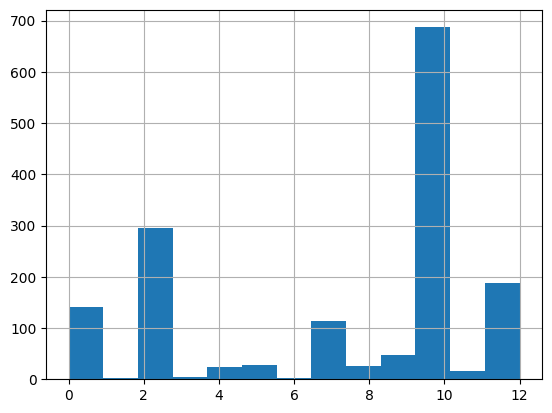

In [211]:
#distribution of topics
#10 is the most common topic
pd.Series(tpl).hist(bins = 13)

In [212]:
#need to get the words realted to each topic. lets create a dictionary for it
#topic word dictionary
tw_d = {}

for i in range(0,13):
  ttt = i

  #take only top 10 words
  wt = optimal_model.get_topic_terms(i, topn=10)

  #convert from word index to actal word
  rwt = []
  # Iterate over each element in model_corpus
  for element in wt:
      # Extract the second element of each tuple and append it to the new list
      new_element = element[0]
      rwt.append(new_element)

  wl = []
  for i in range(0, len(rwt)):
    wl.append(vocabulary.get(rwt[i]))

  tw_d[ttt] = wl
  print(ttt, wl)


0 ['ireland', 'northern', 'said', 'ni', 'uk', 'mr', 'government', 'protocol', 'may', 'office']
1 ['airport', 'used', 'weapon', 'operation', 'track', 'building', 'air', 'station', 'military', 'risk']
2 ['premium', 'ulster', 'back', 'belfast', 'time', 'day', 'club', 'week', 'last', 'since']
3 ['case', 'agreement', 'amid', 'dr', 'eu', 'unionist', 'loyalist', 'instead', 'shortage', 'visitor']
4 ['child', 'head', 'opportunity', 'martin', 'must', 'mr', 'varadkar', 'continue', 'sign', 'taoiseach']
5 ['return', 'title', 'championship', 'action', 'charge', 'win', 'race', 'line', 'series', 'world']
6 ['recently', 'wanted', 'soldier', 'founder', 'rock', 'native', 'drama', 'australia', 'solution', 'sporting']
7 ['man', 'court', 'police', 'old', 'murder', 'death', 'attack', 'belfast', 'year', 'prison']
8 ['ulster', 'rugby', 'podcast', 'adam', 'scotland', 'low', 'province', 'bradley', 'round', 'james']
9 ['job', 'service', 'health', 'school', 'department', 'hour', 'hospital', 'announced', 'executive

In [184]:
df.head(5)

,title,Content,append_topic,topic_keyword,t_content
0,Hilltop Lisburn property with spa complex and ...,It's the kind of property that you'd see in a ...,NaN,NaN,hilltop lisburn property spa complex annexed a...
1,‘Life in the tough cul de sacs of Bangor’: NI ...,Northern Ireland writer Colin Bateman has reve...,NaN,NaN,life tough cul de sac bangor ni writer colin b...
2,Diarmuid Gavin: How to prepare your garden for...,"Premium Clear dead leaves, fill planting gaps ...",NaN,NaN,diarmuid gavin prepare garden winter premium c...
3,Period property in exclusive Co Down residenti...,Nestled in what has long been regarded as one ...,NaN,NaN,period property exclusive co residential area ...
4,How to Bury a Dead Mule: ‘WW2 gave my grandfat...,Bangor actor Richard Clements on bringing his ...,NaN,NaN,bury dead mule ww gave grandfather ptsd want k...


In [213]:
df["append_topic"] = tpl

In [214]:
df.head(5)

,title,Content,append_topic,topic_keyword,t_content
0,Hilltop Lisburn property with spa complex and ...,It's the kind of property that you'd see in a ...,12,NaN,hilltop lisburn property spa complex annexed a...
1,‘Life in the tough cul de sacs of Bangor’: NI ...,Northern Ireland writer Colin Bateman has reve...,10,NaN,life tough cul de sac bangor ni writer colin b...
2,Diarmuid Gavin: How to prepare your garden for...,"Premium Clear dead leaves, fill planting gaps ...",9,NaN,diarmuid gavin prepare garden winter premium c...
3,Period property in exclusive Co Down residenti...,Nestled in what has long been regarded as one ...,12,NaN,period property exclusive co residential area ...
4,How to Bury a Dead Mule: ‘WW2 gave my grandfat...,Bangor actor Richard Clements on bringing his ...,10,NaN,bury dead mule ww gave grandfather ptsd want k...


In [224]:
for i in range(0, len(df)):

  df["topic_keyword"][i] = tw_d[ df["append_topic"][i] ]

In [225]:
df.head(5)

,title,Content,append_topic,topic_keyword,t_content
0,Hilltop Lisburn property with spa complex and ...,It's the kind of property that you'd see in a ...,12,"[year, belfast, said, number, city, company, f...",hilltop lisburn property spa complex annexed a...
1,‘Life in the tough cul de sacs of Bangor’: NI ...,Northern Ireland writer Colin Bateman has reve...,10,"[year, new, one, first, time, world, show, say...",life tough cul de sac bangor ni writer colin b...
2,Diarmuid Gavin: How to prepare your garden for...,"Premium Clear dead leaves, fill planting gaps ...",9,"[job, service, health, school, department, hou...",diarmuid gavin prepare garden winter premium c...
3,Period property in exclusive Co Down residenti...,Nestled in what has long been regarded as one ...,12,"[year, belfast, said, number, city, company, f...",period property exclusive co residential area ...
4,How to Bury a Dead Mule: ‘WW2 gave my grandfat...,Bangor actor Richard Clements on bringing his ...,10,"[year, new, one, first, time, world, show, say...",bury dead mule ww gave grandfather ptsd want k...


In [142]:
#depending on domain knowledge we can give these topics names

In [230]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [231]:
df.to_excel("Result.xlsx")

['year', 'belfast', 'said', 'number', 'city', 'company', 'food', 'car', 'last', 'road']
